In [1]:
import os
import sys
import jax
#jax.config.update("jax_enable_x64", True)
sys.path.append('../synax/')

import synax,bfield
import jax.numpy as jnp
import interpax
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
import scipy.constants as const

2024-07-25 14:16:06.275582: W external/xla/xla/service/gpu/nvptx_compiler.cc:765] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.5.40). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


(3, 49152, 256)

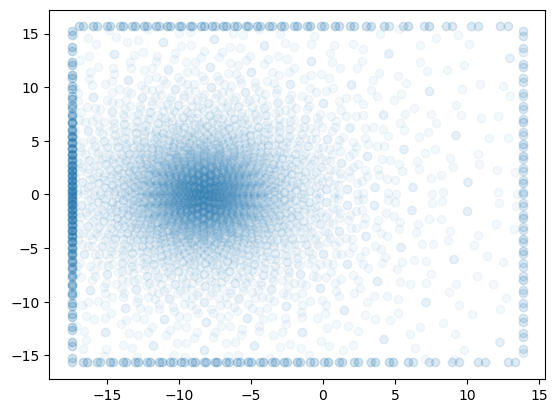

In [2]:
nside = 64
num_int_points = 256
#obtain_vmap = jax.vmap(lambda theta,phi:synax.obtain_positions(theta,phi,num_int_points=num_int_points))
#n_pixs = np.arange(0,12*nside**2)
#theta,phi = hp.pix2ang(nside,n_pixs)
poss,dls,nhats = synax.coords.get_healpix_positions(nside=nside,num_int_points=num_int_points)
plt.scatter(poss[0,::10,200],poss[1,::10,200],alpha=0.05)
poss.shape

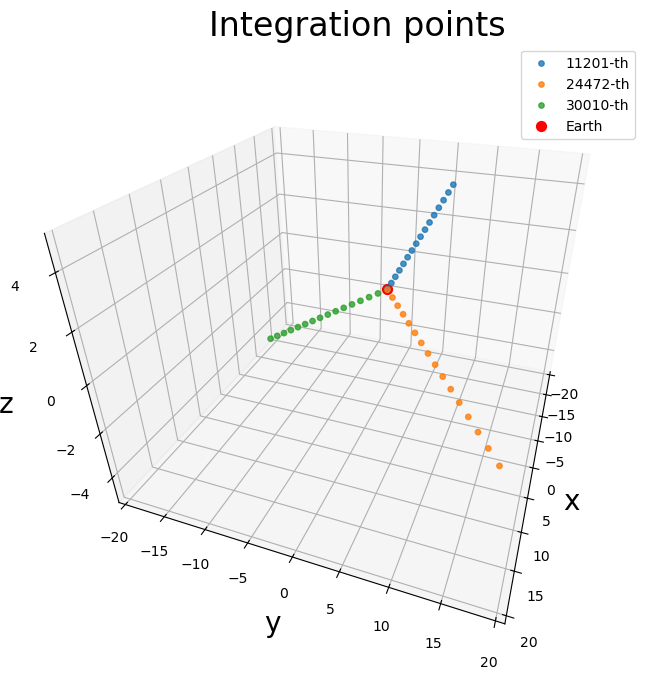

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generate some sample data
num_points = 50
idx = 30000
x = poss[0,30000,:256:16]
y = poss[1,30000,:256:16]
z = poss[2,30000,:256:16]

# Create a 3D scatter plot
fig = plt.figure(figsize = (7,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_proj_type('persp', focal_length=0.2)

idx = 11201
x = poss[0,idx,:256:16]
y = poss[1,idx,:256:16]
z = poss[2,idx,:256:16]
ax.scatter(x, y, z, marker='o',alpha = 0.8,s=15.)

idx = 24472
x = poss[0,idx,:256:16]
y = poss[1,idx,:256:16]
z = poss[2,idx,:256:16]
ax.scatter(x, y, z, marker='o',alpha = 0.8,s=15.)

idx = 30010
x = poss[0,idx,:256:16]
y = poss[1,idx,:256:16]
z = poss[2,idx,:256:16]
ax.scatter(x, y, z, marker='o',alpha = 0.8,s=15.)





ax.scatter(-8.3, 0., 0.006, c='r', marker='o',s=50)

# Set labels for the axes
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_zlabel('z',fontsize=20)

ax.set_xlim((-20,20))
ax.set_ylim((-20,20))
ax.set_zlim((-5,5))
# Set title
ax.set_title('Integration points',fontsize=24)
ax.view_init(30., 20, 0.)
ax.legend(['11201-th','24472-th','30010-th','Earth'])
# Show the plot
plt.subplots_adjust(left=0.5,right=1.0)
plt.tight_layout()
#plt.savefig('..figures/integration_points.pdf',dpi=500,bbox_inches='tight')